In [1]:
from nnet import Net
from torchvision import transforms
from torchvision.datasets import ImageFolder
import torch
from torch.utils.data import DataLoader,random_split
import torch.nn as nn
import torch.optim as optim
import numpy as np
import cv2
from PIL import Image
from sklearn.metrics import f1_score 
from utils import TRANSFORM,NUM_CHANNELS,imshow
import torchvision

In [2]:
EPOCHS = 10
BATCH_SIZE = 64
LR = 0.005
MOMENTUM = 0.9

In [3]:
def load_dataset_from_folder(all_data_path = '../data/Generic',validation_split_size= 0.1,batch_size = 16, num_workers = 2,shuffle = True):
    all_data = ImageFolder(
        root = all_data_path,
        transform = TRANSFORM
    )
    
    classes = all_data.classes

    validation_size = int(validation_split_size * len(all_data))
    train_size = len(all_data) - validation_size
    train_dataset, test_dataset = torch.utils.data.random_split(all_data, [train_size, validation_size])

    training_data_loader = DataLoader(
        train_dataset,
        batch_size=batch_size,
        num_workers=num_workers,
        shuffle=shuffle
    )
    
    validation_dataset_loader = DataLoader(
        test_dataset,
        batch_size=batch_size,
        num_workers=num_workers,
        shuffle=shuffle
    )
        
    return training_data_loader,validation_dataset_loader,classes

In [4]:
net = Net(NUM_CHANNELS)
trainloader,testloader,classes = load_dataset_from_folder(batch_size = BATCH_SIZE)
# net.save(classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=LR, momentum=MOMENTUM)

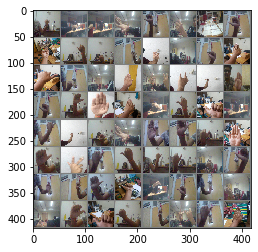

 Next Others Others Others


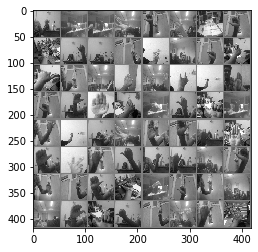

 Next Others Others Others


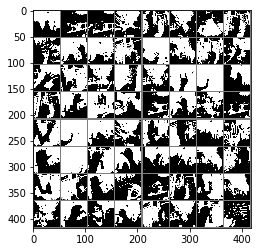

 Next Others Others Others


In [5]:
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images[:,:3,:,:]))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

# show images
imshow(torchvision.utils.make_grid(images[:,3:4,:,:]))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

# show images
imshow(torchvision.utils.make_grid(images[:,4:5,:,:]))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [ ]:
for epoch in range(EPOCHS):

    running_loss = 0.0
    for i, data in enumerate(trainloader):
        inputs, labels = data


        outputs = net(inputs)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 10 == 9:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 10))
            running_loss = 0.0
            
    net.save(classes)
    print('Model saved')
    y_true = []
    y_pred = []

    class_correct = list(0. for i in range(4))
    class_total = list(0. for i in range(4))
    
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
    #         print(images.shape)
            _, predicted = torch.max(outputs, 1)
            for i in range(len(predicted)):
                y_pred.append(predicted[i])
                y_true.append(labels[i])
            c = (predicted == labels).squeeze()
            for i in range(min(BATCH_SIZE,len(labels))):
                label = labels[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1
    
    print(f1_score(y_true, y_pred, average='weighted'))

[1,    30] loss: 4.151
[1,    60] loss: 4.128


In [7]:
class_correct = list(0. for i in range(4))
class_total = list(0. for i in range(4))

y_true = []
y_pred = []

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
#         print(images.shape)
        _, predicted = torch.max(outputs, 1)
        for i in range(len(predicted)):
            y_pred.append(predicted[i])
            y_true.append(labels[i])
        c = (predicted == labels).squeeze()
        for i in range(min(BATCH_SIZE,len(labels))):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(4):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

print(f1_score(y_true, y_pred, average='weighted'))

Accuracy of  Next : 99 %
Accuracy of Others : 97 %
Accuracy of Pause : 98 %
Accuracy of  Prev : 89 %
0.9589939229577304
